In [15]:
#%matplotlib

import test
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy.signal as sg
import pandas as pd
from scipy import stats as st
from sklearn.metrics import accuracy_score as acc
from sklearn import model_selection as ms
import numpy as np
import warnings

pd.plotting.register_matplotlib_converters()

def warn(*args,**kwargs):
    pass

warnings.warn=warn

## Get Data

In [16]:
data_o = test.testbed(start=dt(2020,7,1),stop=dt(2020,7,10),interval='5minutes')


Starting dump run for date range 2020-07-01 00:00:00 - 2020-07-10 00:00:00 @interval=5minutes


Data acquired. Total data points:2591

Creating Parameter system of order:3...

Parameters are ready...

- Creating addtional features...

Data modelling complete...

- Dump Complete...


In [17]:
Fs = len(data_o)*4
data_o.columns.values

array(['l', 'h', 'o', 'c', 'v', 'x1', 'd1dotx1', 'd2dotx1', 'x2',
       'd1dotx2', 'd2dotx2', 'x1pol', 'x2pol', 'quad_abs', 'idpos1',
       'x1nm', 'd1dotx1nm', 'd2dotx1nm', 'x2nm', 'd1dotx2nm', 'd2dotx2nm',
       'x1fft', 'x1ifft', 'x2fft', 'x2ifft'], dtype=object)

In [18]:
data_o.describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,l,h,o,c,v,x1,d1dotx1,d2dotx1,x2,d1dotx2,...,x1nm,d1dotx1nm,d2dotx1nm,x2nm,d1dotx2nm,d2dotx2nm,x1fft,x1ifft,x2fft,x2ifft
count,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,...,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2.591000e+03+0.000000e+00j,2591.0000+0.0000j,2.591000e+03+0.000000e+00j,2.591000e+03+0.000000e+00j
mean,232.742420,233.118572,232.933964,232.939761,313.486138,-0.009731,0.107352,0.019086,0.006604,0.000100,...,-0.000002,0.000012,0.000001,0.002620,0.000033,-0.000023,0.000000e+00-1.096940e-17j,-0.000002+0.000000j,1.234057e-17+2.742349e-17j,2.620487e-03+2.596476e-19j
std,7.205178,7.274844,7.241648,7.244770,468.872791,478.417065,801.196149,1445.483644,0.316668,0.447544,...,0.091169,0.092054,0.084318,0.125662,0.146736,0.145333,N000000000000a000000000000N,0.091169+0.000000j,1.161059e+00+0.000000e+00j,1.256620e-01+0.000000e+00j
min,222.780000,224.110000,223.740000,223.740000,2.163000,-3854.584000,-8703.526000,-17143.300000,-2.520000,-2.290000,...,-0.734541,-1.000000,-1.000000,-1.000000,-0.750820,-0.840824,-1.245392e+01-1.695733e+00j,-0.734541+0.000000j,-1.419647e+01+1.628779e+00j,-1.000000e+00-5.551115e-17j
25%,226.395000,226.685000,226.565000,226.560000,84.363500,-117.256000,-165.404000,-345.960500,-0.150000,-0.230000,...,-0.022345,-0.019004,-0.020181,-0.059524,-0.075410,-0.074906,-1.797610e+00-5.685378e+00j,-0.022345+0.000000j,-2.966248e+00+2.105426e+00j,-5.952381e-02+3.816392e-17j
50%,229.110000,229.480000,229.280000,229.290000,170.290000,-4.102000,32.491000,5.417000,0.000000,-0.010000,...,-0.000782,0.003733,0.000316,0.000000,-0.003279,-0.001873,-7.390155e-03-2.323539e-01j,-0.000782+0.000000j,1.644677e-01+2.122762e+00j,9.518463e-17-2.202900e-17j
75%,238.975000,239.400000,239.190000,239.200000,335.843000,100.810500,233.301500,382.927000,0.160000,0.230000,...,0.019211,0.026805,0.022337,0.063492,0.075410,0.076779,1.798712e+00-1.141254e+00j,0.019211-0.000000j,3.169017e+00+1.776357e-15j,6.349206e-02-5.551115e-17j
max,248.570000,249.000000,248.780000,248.810000,5954.087000,5247.610000,8439.774000,13999.663000,2.070000,3.050000,...,1.000000,0.969696,0.816626,0.821429,1.000000,1.000000,1.372305e+01+1.590090e+00j,1.000000+0.000000j,1.654750e+01-6.877554e+00j,8.214286e-01-5.551115e-17j


In [19]:
x1 = 'x1nm'
x2 = 'x2nm'

data_o[[x1,x2]].plot(subplots=True)
plt.show()

Spc, fr, t,im  = plt.specgram(data_o[x1],Fs=Fs)
plt.title('specgram x1')
plt.xlabel('t')
plt.ylabel('fr')
plt.colorbar()
plt.show()

Spc, fr, t,im  = plt.specgram(data_o[x2],Fs=Fs)
plt.title('specgram x2')
plt.xlabel('t')
plt.ylabel('fr')
plt.colorbar()
plt.show()

np.logaddexp(data_o[x1],data_o[x2]).plot()
plt.title("Log sum of signal exponents - log(exp(x1)+exp(x2))")
plt.show()

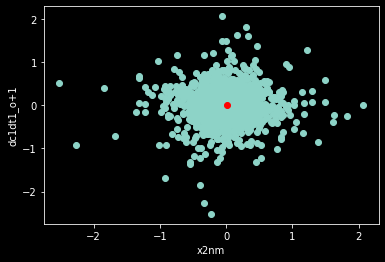

In [31]:
data_o.plot.scatter(x1,x2)
plt.plot(data_o[x1].mean(),data_o[x2].mean(),color='r',marker='o')
plt.show()
plt.scatter(data_o[x2],data_o[x2].shift(-1))
plt.xlabel(x2)
plt.ylabel('dc1dt1_o+1')
plt.plot(data_o[x2].mean(),data_o[x2].shift(-1).mean(),color='r',marker='o')
plt.show()

plt.scatter(data_o[x1],data_o[x1].shift(-1))
plt.xlabel(x1)
plt.ylabel('dv1dt1_o+1')
plt.plot(data_o[x1].mean(),data_o[x1].shift(-1).mean(),color='r',marker='o')
plt.show()

plt.scatter(data_o['dv2dt2nm'],data_o['dc2dt2nm'])
plt.plot(data_o.dv2dt2nm.mean(),data_o.dc2dt2nm.mean(),color='r',marker='o')
plt.ylabel('dc2dt2')
plt.xlabel('dv2dt2')
plt.show()

In [36]:
def get_roots(inp):
    x = np.arange(0,len(inp))

    dc_ply = np.polynomial.Polynomial.fit(x,inp,deg=2)
    coefs = dc_ply.coef

    m = coefs[2]/coefs[2]
    c = coefs[1]/coefs[2]
    k = coefs[0]/coefs[2]

    return {'m':m,'c':c,'k':k, 'roots':dc_ply.roots().tolist()}

In [37]:
get_roots(data_o.x1nm[:2])

{'m': 1.0,
 'c': 2.0,
 'k': 1.0000000000000004,
 'roots': [-1.0536712127723509e-08j, 1.0536712127723509e-08j]}

In [22]:
def freq_analysis(x):
    s,fm,l = plt.magnitude_spectrum(x,Fs=Fs)
    plt.show()

    de = st.describe(s)
    # data_o['mag_min'] = de.minmax[0]
    # data_o['mag_max'] = de.minmax[1]
    # data_o['mag_mean'] = de.mean
    # data_o['mag_var'] = de.variance
    # data_o['mag_skw'] = de.skewness
    # data_o['mag_krt'] = de.kurtosis

    print('min energy:',de.minmax[0],'@',fm[s==s.min()][0],'Hz','/',2*np.pi*fm[s==s.min()][0],'Rad/s')
    print('zeroes:',fm[np.abs(s) <0.001][0],'Hz','/',2*np.pi*fm[s==s.max()][0],'Rad/s')
    print('max energy:',de.minmax[1],'@',fm[s==s.max()][0],'Hz','/',2*np.pi*fm[s==s.max()][0],'Rad/s')
    print('mean energy:',de.mean,'@',fm[s.round(4)==s.mean().round(4)],'Hz','/',2*np.pi*fm[s.round(4)==s.mean().round(4)],'Rad/s')

    p,fp,l = plt.phase_spectrum(x,Fs=Fs)
    plt.show()
    de = st.describe(p)
    # data_o['phs_min'] = de.minmax[0]
    # data_o['phs_max'] = de.minmax[1]
    # data_o['phs_mean'] = de.mean
    # data_o['phs_var'] = de.variance
    # data_o['phs_skw'] = de.skewness
    # data_o['phs_krt'] = de.kurtosis

    print('phase @ fnat:',fp[s==s.max()][0],'Hz=',p[fp==fm[s==s.max()][0]][0],'Rads')
    print('min phase:',de.minmax[0],'@',fp[s==s.min()][0],'Hz','/',2*np.pi*fp[s==s.min()][0],'Rad/s')
    print('max phase:',de.minmax[1],'@',fp[s==s.max()][0],'Hz','/',2*np.pi*fp[s==s.max()][0],'Rad/s')
    print('mean phase:',de.mean,'@',fp[s.round(4)==s.mean().round(4)],'Hz','/',2*np.pi*fm[s.round(4)==s.mean().round(4)],'Rad/s')

    a,fa,l = plt.angle_spectrum(x,Fs=Fs)
    de = st.describe(a)
    # data_o['ang_min'] = de.minmax[0]
    # data_o['ang_max'] = de.minmax[1]
    # data_o['ang_mean'] = de.mean
    # data_o['ang_var'] = de.variance
    # data_o['ang_skw'] = de.skewness
    # data_o['ang_krt'] = de.kurtosis

    plt.show()
    print('angle @ fnat:',fm[s==s.max()][0],'Hz=',a[fa==fm[s==s.max()][0]][0],'Rads')
    print('min angle:',de.minmax[0],'@',fm[s==s.min()][0],'Hz','/',2*np.pi*fm[s==s.min()][0],'Rad/s')
    print('max angle:',de.minmax[1],'@',fm[s==s.max()][0],'Hz','/',2*np.pi*fm[s==s.max()][0],'Rad/s')
    print('mean angle:',de.mean,'@',fm[s.round(4)==s.mean().round(4)],'Hz','/',2*np.pi*fm[s.round(4)==s.mean().round(4)],'Rad/s')

    pwr,fr = plt.psd(x,noverlap=len(data_o)//2,NFFT=len(data_o),Fs=Fs)
    de = st.describe(pwr)
    # data_o['pwr_min'] = de.minmax[0]
    # data_o['pwr_max'] = de.minmax[1]
    # data_o['pwr_mean'] = de.mean
    # data_o['pwr_var'] = de.variance
    # data_o['pwr_skw'] = de.skewness
    # data_o['pwr_krt'] = de.kurtosis

    plt.show()
    print('max psd dB/Hz:',pwr.max(),'@',fr[pwr==pwr.max()][0],'Hz','/',2*np.pi*fr[pwr==pwr.max()][0],'Rad/s')
    print('min psd dB/Hz:',pwr.min(),'@',fr[pwr==pwr.min()][0],'Hz','/',2*np.pi*fr[pwr==pwr.min()][0],'Rad/s')
    print('mean psd dB/Hz:',pwr.mean(),'@',fr[pwr.round(4)==pwr.mean().round(4)],'Hz','/',2*np.pi*fr[pwr.round(4)==pwr.mean().round(4)],'Rad/s')

    de

In [23]:
freq_analysis(data_o.x1nm)

min energy: 5.688191599338821e-06 @ 44.0 Hz / 276.46015351590177 Rad/s
zeroes: 0.0 Hz / 31541.590242041522 Rad/s
max energy: 0.00824704272979966 @ 5020.0 Hz / 31541.590242041522 Rad/s
mean energy: 0.0018669873467888922 @ [ 600.  852. 1184. 1244. 1260. 1280. 1332. 1336. 1376. 1420. 1456. 1572.
 1612. 1632. 1920. 1984. 2104. 2108. 2256. 2296. 2384. 2556. 2648. 2760.
 2788. 3024. 3264. 3400. 3900. 3952. 3972. 3992. 4120. 4308. 4448. 4668.
 5140.] Hz / [ 3769.91118431  5353.27388172  7439.2914037   7816.28252213
  7916.81348705  8042.47719319  8369.20282916  8394.33557039
  8645.66298268  8922.1231362   9148.31780725  9877.16730289
 10128.49471517 10254.15842132 12063.71578978 12465.83964944
 13219.82188631 13244.95462753 14174.866053   14426.19346528
 14979.11377232 16059.82164515 16637.87469341 17341.59144782
 17517.52063642 19000.35236891 20508.31684263 21362.83004441
 24504.422698   24831.14833397 24956.81204012 25082.47574626
 25886.72346558 27067.96230333 27947.60824633 29329.9090139

phase @ fnat: 5020.0 Hz= 1495.3363019422695 Rads
min phase: -0.4395056545583219 @ 44.0 Hz / 276.46015351590177 Rad/s
max phase: 1538.9460956260446 @ 5020.0 Hz / 31541.590242041522 Rad/s
mean phase: 754.679073593153 @ [ 600.  852. 1184. 1244. 1260. 1280. 1332. 1336. 1376. 1420. 1456. 1572.
 1612. 1632. 1920. 1984. 2104. 2108. 2256. 2296. 2384. 2556. 2648. 2760.
 2788. 3024. 3264. 3400. 3900. 3952. 3972. 3992. 4120. 4308. 4448. 4668.
 5140.] Hz / [ 3769.91118431  5353.27388172  7439.2914037   7816.28252213
  7916.81348705  8042.47719319  8369.20282916  8394.33557039
  8645.66298268  8922.1231362   9148.31780725  9877.16730289
 10128.49471517 10254.15842132 12063.71578978 12465.83964944
 13219.82188631 13244.95462753 14174.866053   14426.19346528
 14979.11377232 16059.82164515 16637.87469341 17341.59144782
 17517.52063642 19000.35236891 20508.31684263 21362.83004441
 24504.422698   24831.14833397 24956.81204012 25082.47574626
 25886.72346558 27067.96230333 27947.60824633 29329.90901391
 3

angle @ fnat: 5020.0 Hz= -0.06180116646801059 Rads
min angle: -3.1357114739960603 @ 44.0 Hz / 276.46015351590177 Rad/s
max angle: 3.140999955158305 @ 5020.0 Hz / 31541.590242041522 Rad/s
mean angle: 0.05688267253957867 @ [ 600.  852. 1184. 1244. 1260. 1280. 1332. 1336. 1376. 1420. 1456. 1572.
 1612. 1632. 1920. 1984. 2104. 2108. 2256. 2296. 2384. 2556. 2648. 2760.
 2788. 3024. 3264. 3400. 3900. 3952. 3972. 3992. 4120. 4308. 4448. 4668.
 5140.] Hz / [ 3769.91118431  5353.27388172  7439.2914037   7816.28252213
  7916.81348705  8042.47719319  8369.20282916  8394.33557039
  8645.66298268  8922.1231362   9148.31780725  9877.16730289
 10128.49471517 10254.15842132 12063.71578978 12465.83964944
 13219.82188631 13244.95462753 14174.866053   14426.19346528
 14979.11377232 16059.82164515 16637.87469341 17341.59144782
 17517.52063642 19000.35236891 20508.31684263 21362.83004441
 24504.422698   24831.14833397 24956.81204012 25082.47574626
 25886.72346558 27067.96230333 27947.60824633 29329.9090139

max psd dB/Hz: 2.2662487933705935e-05 @ 5020.0 Hz / 31541.590242041522 Rad/s
min psd dB/Hz: 1.078101200403227e-11 @ 44.0 Hz / 276.46015351590177 Rad/s
mean psd dB/Hz: 1.6886311625410793e-06 @ [0.000e+00 4.000e+00 8.000e+00 ... 5.172e+03 5.176e+03 5.180e+03] Hz / [0.00000000e+00 2.51327412e+01 5.02654825e+01 ... 3.24966344e+04
 3.25217671e+04 3.25468999e+04] Rad/s


In [24]:
freq_analysis(data_o.x2nm)

min energy: 0.00013027195018432833 @ 2244.0 Hz / 14099.467829310992 Rad/s
zeroes: 32.0 Hz / 16386.54728112436 Rad/s
max energy: 0.007569907626921568 @ 2608.0 Hz / 16386.54728112436 Rad/s
mean energy: 0.002415835212134977 @ [ 568.  800.  972. 1064. 1084. 1292. 1632. 1724. 1732. 1992. 2036. 2252.
 2316. 2492. 2508. 2624. 2692. 2868. 3052. 3072. 3236. 3340. 3540. 3700.
 3732. 3960. 3972. 3988. 4012. 4572. 4656. 4696. 4700. 4972. 4976. 5168.] Hz / [ 3568.84925448  5026.54824574  6107.25611858  6685.30916684
  6810.97287298  8117.87541688 10254.15842132 10832.21146958
 10882.47695204 12516.1051319  12792.56528542 14149.73331177
 14551.85717143 15657.69778549 15758.22875041 16487.07824604
 16914.33484693 18020.17546099 19176.28155751 19301.94526366
 20332.38765403 20985.83892598 22242.47598742 23247.78563656
 23448.84756639 24881.41381643 24956.81204012 25057.34300503
 25208.1394524  28726.72322443 29254.51079023 29505.83820252
 29530.97094374 31239.9973473  31265.13008853 32471.5016675 ] Ra

phase @ fnat: 2608.0 Hz= 533.8207907361998 Rads
min phase: 5.854155273240264e-17 @ 2244.0 Hz / 14099.467829310992 Rad/s
max phase: 1111.2059490494546 @ 2608.0 Hz / 16386.54728112436 Rad/s
mean phase: 550.1106351519934 @ [ 568.  800.  972. 1064. 1084. 1292. 1632. 1724. 1732. 1992. 2036. 2252.
 2316. 2492. 2508. 2624. 2692. 2868. 3052. 3072. 3236. 3340. 3540. 3700.
 3732. 3960. 3972. 3988. 4012. 4572. 4656. 4696. 4700. 4972. 4976. 5168.] Hz / [ 3568.84925448  5026.54824574  6107.25611858  6685.30916684
  6810.97287298  8117.87541688 10254.15842132 10832.21146958
 10882.47695204 12516.1051319  12792.56528542 14149.73331177
 14551.85717143 15657.69778549 15758.22875041 16487.07824604
 16914.33484693 18020.17546099 19176.28155751 19301.94526366
 20332.38765403 20985.83892598 22242.47598742 23247.78563656
 23448.84756639 24881.41381643 24956.81204012 25057.34300503
 25208.1394524  28726.72322443 29254.51079023 29505.83820252
 29530.97094374 31239.9973473  31265.13008853 32471.5016675 ] Rad/s

angle @ fnat: 2608.0 Hz= -0.24996037406435143 Rads
min angle: -3.127393809446086 @ 2244.0 Hz / 14099.467829310992 Rad/s
max angle: 3.138879499456381 @ 2608.0 Hz / 16386.54728112436 Rad/s
mean angle: -0.007448802996200214 @ [ 568.  800.  972. 1064. 1084. 1292. 1632. 1724. 1732. 1992. 2036. 2252.
 2316. 2492. 2508. 2624. 2692. 2868. 3052. 3072. 3236. 3340. 3540. 3700.
 3732. 3960. 3972. 3988. 4012. 4572. 4656. 4696. 4700. 4972. 4976. 5168.] Hz / [ 3568.84925448  5026.54824574  6107.25611858  6685.30916684
  6810.97287298  8117.87541688 10254.15842132 10832.21146958
 10882.47695204 12516.1051319  12792.56528542 14149.73331177
 14551.85717143 15657.69778549 15758.22875041 16487.07824604
 16914.33484693 18020.17546099 19176.28155751 19301.94526366
 20332.38765403 20985.83892598 22242.47598742 23247.78563656
 23448.84756639 24881.41381643 24956.81204012 25057.34300503
 25208.1394524  28726.72322443 29254.51079023 29505.83820252
 29530.97094374 31239.9973473  31265.13008853 32471.5016675 ] Ra

max psd dB/Hz: 1.909379503840533e-05 @ 2608.0 Hz / 16386.54728112436 Rad/s
min psd dB/Hz: 5.654743702882394e-09 @ 2244.0 Hz / 14099.467829310992 Rad/s
mean psd dB/Hz: 2.477105020622178e-06 @ [0.000e+00 4.000e+00 8.000e+00 ... 5.172e+03 5.176e+03 5.180e+03] Hz / [0.00000000e+00 2.51327412e+01 5.02654825e+01 ... 3.24966344e+04
 3.25217671e+04 3.25468999e+04] Rad/s


In [25]:
data_o.describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,l,h,o,c,v,x1,d1dotx1,d2dotx1,x2,d1dotx2,...,x1nm,d1dotx1nm,d2dotx1nm,x2nm,d1dotx2nm,d2dotx2nm,x1fft,x1ifft,x2fft,x2ifft
count,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,...,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2.591000e+03+0.000000e+00j,2591.0000+0.0000j,2.591000e+03+0.000000e+00j,2.591000e+03+0.000000e+00j
mean,232.742420,233.118572,232.933964,232.939761,313.486138,-0.009731,0.107352,0.019086,0.006604,0.000100,...,-0.000002,0.000012,0.000001,0.002620,0.000033,-0.000023,0.000000e+00-1.096940e-17j,-0.000002+0.000000j,1.234057e-17+2.742349e-17j,2.620487e-03+2.596476e-19j
std,7.205178,7.274844,7.241648,7.244770,468.872791,478.417065,801.196149,1445.483644,0.316668,0.447544,...,0.091169,0.092054,0.084318,0.125662,0.146736,0.145333,N000000000000a000000000000N,0.091169+0.000000j,1.161059e+00+0.000000e+00j,1.256620e-01+0.000000e+00j
min,222.780000,224.110000,223.740000,223.740000,2.163000,-3854.584000,-8703.526000,-17143.300000,-2.520000,-2.290000,...,-0.734541,-1.000000,-1.000000,-1.000000,-0.750820,-0.840824,-1.245392e+01-1.695733e+00j,-0.734541+0.000000j,-1.419647e+01+1.628779e+00j,-1.000000e+00-5.551115e-17j
25%,226.395000,226.685000,226.565000,226.560000,84.363500,-117.256000,-165.404000,-345.960500,-0.150000,-0.230000,...,-0.022345,-0.019004,-0.020181,-0.059524,-0.075410,-0.074906,-1.797610e+00-5.685378e+00j,-0.022345+0.000000j,-2.966248e+00+2.105426e+00j,-5.952381e-02+3.816392e-17j
50%,229.110000,229.480000,229.280000,229.290000,170.290000,-4.102000,32.491000,5.417000,0.000000,-0.010000,...,-0.000782,0.003733,0.000316,0.000000,-0.003279,-0.001873,-7.390155e-03-2.323539e-01j,-0.000782+0.000000j,1.644677e-01+2.122762e+00j,9.518463e-17-2.202900e-17j
75%,238.975000,239.400000,239.190000,239.200000,335.843000,100.810500,233.301500,382.927000,0.160000,0.230000,...,0.019211,0.026805,0.022337,0.063492,0.075410,0.076779,1.798712e+00-1.141254e+00j,0.019211-0.000000j,3.169017e+00+1.776357e-15j,6.349206e-02-5.551115e-17j
max,248.570000,249.000000,248.780000,248.810000,5954.087000,5247.610000,8439.774000,13999.663000,2.070000,3.050000,...,1.000000,0.969696,0.816626,0.821429,1.000000,1.000000,1.372305e+01+1.590090e+00j,1.000000+0.000000j,1.654750e+01-6.877554e+00j,8.214286e-01-5.551115e-17j


### Magnitude Squared Coherence

In [26]:
# Magnitude squared coherence Cxy = abs(Pxy)**2/(Pxx*Pyy)
# where Pxx and Pyy are power spectral densities and Pxy is the
# cross spectral density.
fc,Cxy = sg.coherence(data_o.x1nm,data_o.x2nm,fs=Fs)

de = st.describe(Cxy)
# data_o['msc_min'] = de.minmax[0]
# data_o['msc_max'] = de.minmax[1]
# data_o['msc_mean'] = de.mean
# data_o['msc_var'] = de.variance
# data_o['msc_skw'] = de.skewness
# data_o['msc_krt'] = de.kurtosis

plt.semilogy(fc,Cxy)
plt.suptitle('Magnitude squared coherence')
plt.xlabel('freq')
plt.ylabel('coherence')

print('Max Coherence:',Cxy.max(),'@',fc[Cxy==Cxy.max()][0],'Hz')
print('Min Coherence:',Cxy.min(),'@',fc[Cxy==Cxy.min()][0],'Hz')
print('Mean Coherence',Cxy.mean(),'@',fc[Cxy.round(2)==np.round(Cxy.mean(),2)][0],'Hz')
print('Variance:',np.var(Cxy))
print('Kurtosis:',st.kurtosis(Cxy))
pd.Series(Cxy).describe()

Max Coherence: 0.2640054247401394 @ 2186.15625 Hz
Min Coherence: 0.0011555430339431777 @ 1619.375 Hz
Mean Coherence 0.07329269078650417 @ 607.265625 Hz
Variance: 0.0038684819059980314
Kurtosis: 0.3196201020006817


count    129.000000
mean       0.073293
std        0.062440
min        0.001156
25%        0.023595
50%        0.059492
75%        0.108440
max        0.264005
dtype: float64

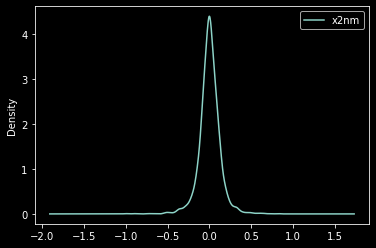

<AxesSubplot:ylabel='Frequency'>

In [27]:
data_o[['x2nm']].plot.density()
data_o[['d1dotx2nm']].plot.hist()
plt.show()

data_o[['x1nm']].plot.density()
data_o[['d1dotx1nm']].plot.hist()

### Correlation Leaderboard

In [33]:
corr = data_o.corr()
corr[['d1dotx1nm','d1dotx2nm','idpos1']].T

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\internals\managers.py:1517: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


,l,h,o,c,v,x1,d1dotx1,d2dotx1,x2,d1dotx2,...,x1nm,d1dotx1nm,d2dotx1nm,x2nm,d1dotx2nm,d2dotx2nm,x1fft,x1ifft,x2fft,x2ifft
d1dotx1nm,-0.002829,0.003249,0.000430,0.000191,0.245117,0.837351,1.000000,0.902082,-0.009603,-0.003158,...,0.837351,1.000000,0.902082,-0.009603,-0.003158,0.015885,-0.009123,0.837351,0.008557,-0.009603
d1dotx2nm,-0.015892,-0.013949,-0.030779,-0.000286,0.021622,0.006045,-0.003158,-0.002494,0.706555,1.000000,...,0.006045,-0.003158,-0.002494,0.706555,1.000000,0.867010,-0.009264,0.006045,0.017509,0.706555
idpos1,0.026239,0.026488,0.010182,0.039808,0.010151,-0.019275,-0.012448,-0.006342,0.688276,0.511078,...,-0.019275,-0.012448,-0.006342,0.688276,0.511078,0.306762,0.010306,-0.019275,0.012025,0.688276
